# Central limit theorem

The central limit theorem says that if we add up enough independent random vaiables, we end up with something that tends towards a normal distribution. 

https://en.wikipedia.org/wiki/Central_limit_theorem

## Adding up dice

A die is a pretty good real world illustration of a uniform random variable. Before throwing a die, all sides are equally likely to come up. However, when is has been thrown, only one value is shown. This can be compared to a random variable with an associated distribuiton and one realisation. 

Note that the probability in the plot sum to one but is distributed per outcome. Note to be confused with how a continous stochastic variable would be normalized. 

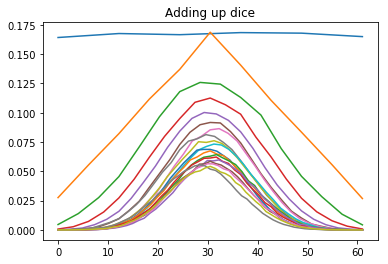

In [233]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n_samples = 100000

def adding_dice(n_samples, n_throws_per_sample, n_outcomes=6):
    throws = np.random.randint(low=1, high=n_outcomes+1, size=(n_samples, n_throws_per_sample))
    return np.sum(throws, axis=1)

def histogram(v):
    H = np.zeros(np.unique(v).shape)
    for i, e in enumerate(np.sort(np.unique(v))):
        H[i] = np.sum(v==e)
    H /= np.sum(H)
    return H

X = list()
for i in range(1, 21):
    X.append(adding_dice(n_samples, i))
H = [histogram(x) for x in X]
max_length = np.max([len(h) for h in H])

plt.figure()
for y in H:
    x = np.asarray(range(len(y)), dtype=np.float)
    x *= max_length/np.max(x)
    plt.plot(x, y)
plt.title("Adding up dice")
plt.show()

Let's compare the results of the added dice to a normal PDF.

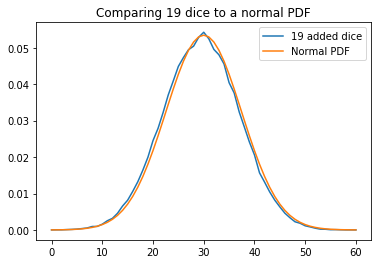

In [236]:
n_dice = 19

from scipy.stats import norm

plt.figure()
plt.title("Comparing %i dice to a normal PDF" % n_dice)
y = H[n_dice-1]
x = np.asarray(range(len(y)), dtype=np.float)
plt.plot(x, y, label="%i added dice" % n_dice)
plt.plot(x, norm.pdf(x, np.mean(x), np.sqrt(np.sum(y/np.sum(y)*((x-np.mean(x))**2)))), label='Normal PDF')
plt.legend()
plt.show()

5.133748143413348

## Beads



First, a population is created.

In [134]:
import numpy as np

n_population = 16000
population = np.zeros(n_population)
colours = ['white', 'red', 'blue', 'green', 'gray']
n_groups = len(colours)

for group in range(1, len(colours)):
    population[:n_population//(2**group)] = group

print("Group probabilities for a population with N=%i" % n_population)
for group in range(len(colours)):
    print("P(%s) = %.2f%%" % (colours[group], 100*np.sum(population==group)/population.shape[0]))

Group probabilities for a population with N=16000
P(white) = 50.00%
P(red) = 25.00%
P(blue) = 12.50%
P(green) = 6.25%
P(gray) = 6.25%


Let's do a poll and see what happens.

In [133]:
n_samples = 100

S = np.random.choice(population, size=n_samples, replace=False)

print("Results from one poll with N=%i" % n_samples)
for group in range(len(colours)):
    print("P(%s) = %.2f%%" % (colours[group], 100*np.sum(S==group)/S.shape[0]))

Results from one poll with N=100
P(white) = 56.00%
P(red) = 22.00%
P(blue) = 13.00%
P(green) = 4.00%
P(gray) = 5.00%


In [194]:
n_samples = 1000
n_polls = 10000

S = np.zeros((n_polls, n_groups))
for i in range(n_polls):
    s = np.random.choice(population, size=n_samples, replace=False)
    for j in range(n_groups):
        S[i, j] = np.sum(s==j)/n_samples

print("Experimental mean values:", np.mean(S, axis=0))
#print(np.std(S, axis=0))
print("Experimental spread as percentile95-percentile5:", np.percentile(S, 95, axis=0) - np.percentile(S, 5, axis=0))

Experimental mean values: [0.5001299 0.2500896 0.1249759 0.0625336 0.062271 ]
Experimental spread as percentile95-percentile5: [0.05  0.044 0.034 0.025 0.024]


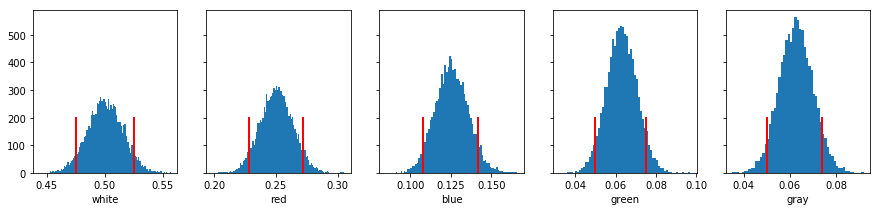

In [195]:
fig, ax = plt.subplots(1, 5, sharey='all', figsize=(15, 3))
for i in range(n_groups):
    ax[i].hist(S[:, i], np.unique(S[:, i]));
    for p in [5, 95]:
        ax[i].plot(np.percentile(S[:, i], p)*np.ones(2), [n_polls//50, 0], 'r-', linewidth=2)
    ax[i].set_xlabel(colours[i])

How is samples size and probability of a class related to the spread of the results?

In [241]:
n_samples = 1000
n_polls = 100

S = np.zeros((n_polls, n_groups))
for i in range(n_polls):
    s = np.random.choice(population, size=n_samples, replace=False)
    for j in range(n_groups):
        S[i, j] = np.sum(s==j)/n_samples

print(np.mean(S, axis=0))
print(np.std(S, axis=0))
print(np.percentile(S, 95, axis=0))
print(np.percentile(S, 5, axis=0))

[0.50053 0.24833 0.12598 0.0632  0.06196]
[0.01382205 0.01352187 0.01023814 0.00729932 0.00673189]
[0.52115 0.2683  0.1411  0.075   0.071  ]
[0.48    0.228   0.109   0.05295 0.053  ]
